# LGBIO1114 - Organes artificiels et réhabilitation 
## TP1 : Rappels théoriques et filtres 

__Auteur :__ Antoine De Comite

__Contenu :__ A l'issue de cette séance vous devriez être capables de : 


*   Comprendre et interpréter les représentations temporelles et fréquentielles d'un signal donné
*   Comprendre le concept de filtre digital
*   Comprendre et expliquer l'impact d'un filtre sur un signal donné




In [ ]:
#Librairies utiles 

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
import ipywidgets as widgets
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

In [ ]:
#@title Data settings
#  
def load_dataset():
  amplitudes = np.random.uniform(low=0.5,high=4,size=(25,1))
  frequencies = np.random.uniform(low=20,high=5000,size=(25,1))
  phases = np.random.uniform(low=0,high=2*np.pi,size=(25,1))
  time_vector = np.linspace(0,1,10000)
  signal_vector = np.zeros_like(time_vector)

  for ii in range(len(amplitudes)):
    signal_vector = signal_vector + amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*time_vector+phases[ii])
  S = np.vstack((time_vector,signal_vector))
  return S

# Partie 1 : Représentation des signaux
**a) Représentation temporelle**

La représentation la plus *classique* d'un signal est une représentation temporelle (i.e. on représente l'évolution de son intensité en fonction du temps). Ce type de représentation n'en est qu'une parmi tant d'autres et ne permet pas forcément d'appréhender correctement tout le contenu du signal...

**Exercice 1a** 

En utilisant la fonction *load_dataset* qui vous est fournie, extrayez les données et préparez les pour en séparer le vecteur temps et l'intensité du signal.

In [ ]:
######################
### Votre code ici ###
######################

# SOLUTION - A RETIRER

S = load_dataset()
t_vector = S[0,:]
input_signal = S[1,:]

**Exercice 1b**

Représentez le signal dans le domaine temporel, que pouvez-vous observer ? 

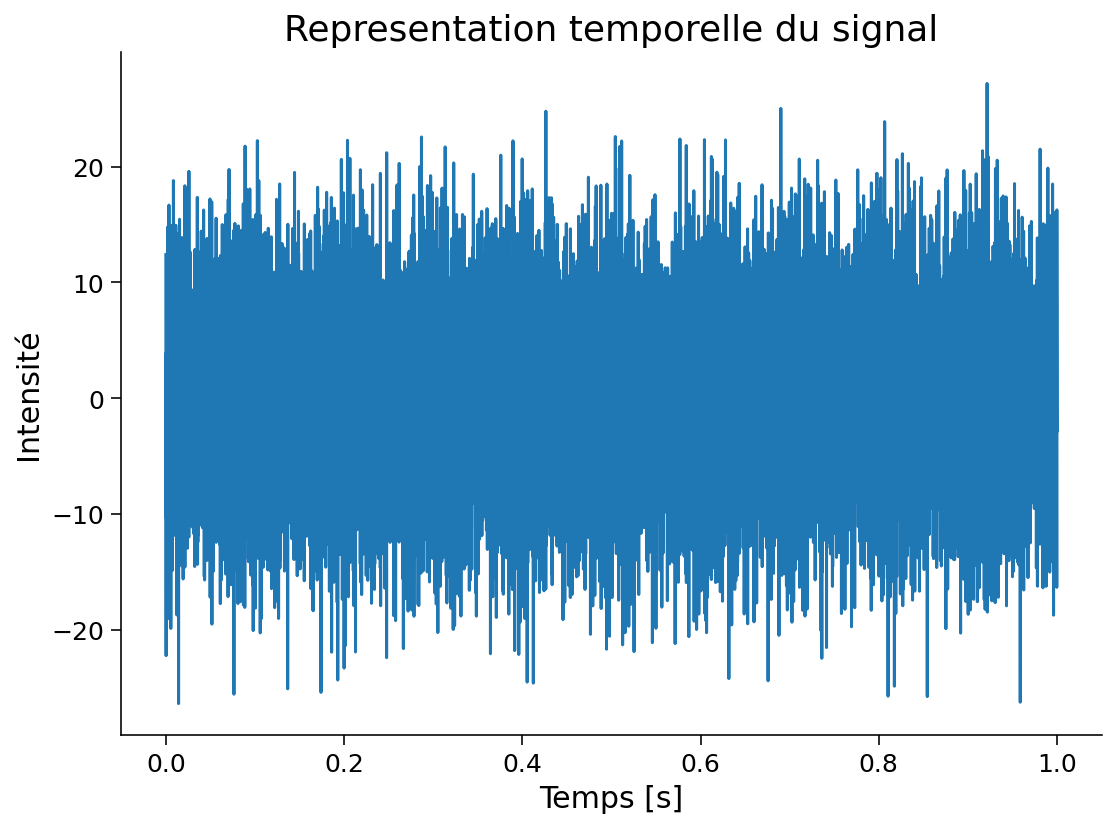

In [ ]:
def RepresTemporelle(t_vector,input_signal):
  # Le but de cette fonciton est de représenter un signal dans le domaine temporel
  # Inputs : t_vector le vecteur temporel
  #          input_signal le signal 
  #
  ######################
  ### Votre code ici ###
  ######################

  #SOLUTION A RETIRER
  plt.plot(t_vector,input_signal)
  plt.title('Representation temporelle du signal')
  plt.xlabel('Temps [s]')
  plt.ylabel('Intensité')
  plt.show()
  


RepresTemporelle(t_vector,input_signal)  

**b) Représentation fréquentielle**

Tout signal temporel peut également être représenté comme une somme infinie de sinus de fréquences et phases différentes. Cette représentation consiste à calculer la transformée de Fourier du signal et de reporter les coefficients des différents sinus contenus dans le signal. 

La représentation fréquentielle est utile pour tout signal qui subira des opérations fréquentielles (filtrage par exemple). 

**Exercice 2**

Complétez la fonction ci-dessous afin de calculer la transformée de Fourier du signal donné en argument et de la représenter graphiquement.

In [ ]:
def computeTF(t_vector,input_signal):
  # Le but de cette fonction est de calculer la transformée de Fourier d'un signal
  # Inputs : t_vector le vecteur temporel
  #          input_signal le signal d'entrée 
  ######################
  ### Votre code ici ###
  ######################

  # SOLUTION A RETIRER
  Fs = 1/(t_vector[1]-t_vector[0])
  tf_sig = np.fft.fft(input_signal)
  f_vector = np.linspace(0,Fs//2,len(input_signal)//2)
  return tf_sig,f_vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


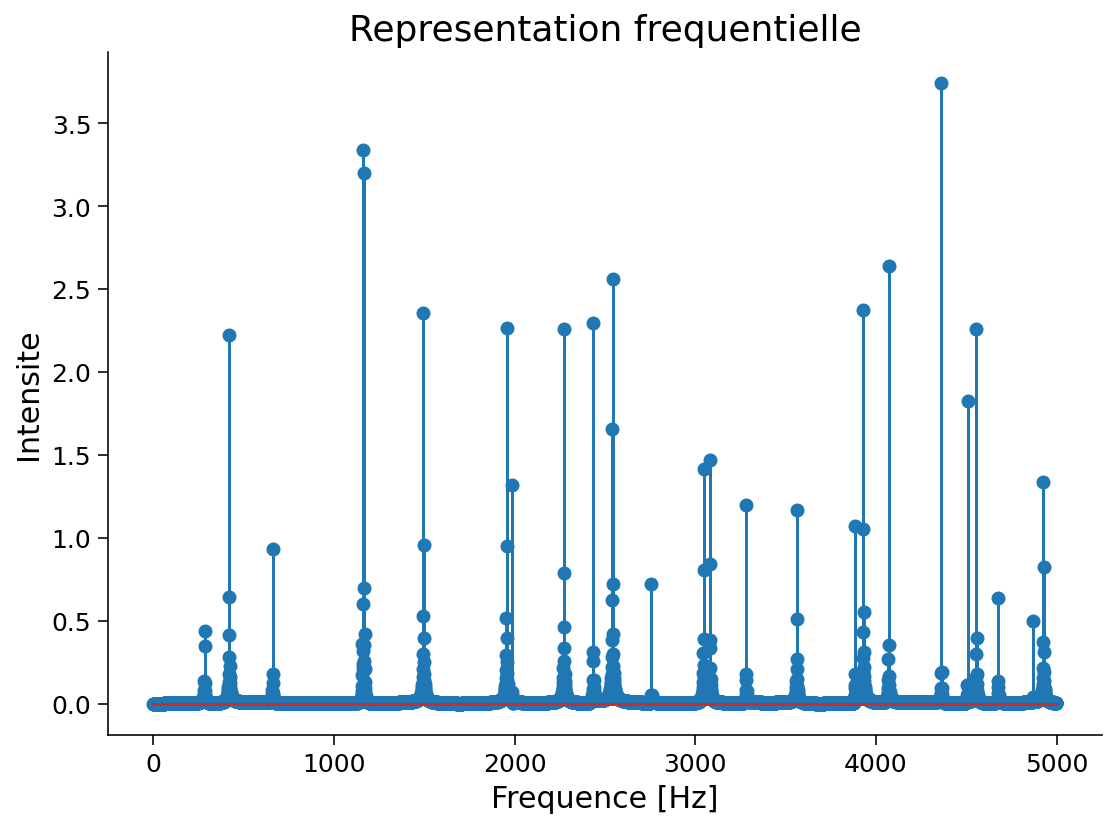

In [ ]:
def RepresFreq(f_vecteur,tf_sig):
  # Le but de cette fonction est de représenter la transformée de Fourier d'un signal
  # Inputs : f_vector est le vecteur de fréquences
  #          tf_sig est la transformée de fourier qu'on veut représenter
  ######################
  ### Votre code ici ###
  ######################
  #SOLUTION A RETIRER 
  plt.stem(f_vecteur,tf_sig)
  plt.title('Representation frequentielle')
  plt.xlabel('Frequence [Hz]')
  plt.ylabel('Intensite')
  plt.show()


######################
### Votre code ici ###
######################

# Grace aux fonctions définies ci-dessus calculez et representez la transformee de Fourier du signal fourni.

#SOLUTION A RETIRER 

tf_sig,f_vector = computeTF(t_vector,input_signal)
tf_sig = 2*abs(tf_sig[:len(input_signal)//2]/len(input_signal))
RepresFreq(f_vector,tf_sig)

## Partie 2 : Filtrage 

Le filtrage est un procédé qui permet de sélectionner tout ou une partie du spectre d'un signal afin de soit s'en débarasser soit ne garder que cette partie du spectre. Dans ces séances, nous allons rencontrer trois types de filtres : 

* Filtre passe-bas
* Filtre passe-haut
* Filtre passe-bande

Pour chaque filtre, il est possible de calculer la réponse impulsionnelle et d'étudier ses caractéristiques fréquentielles. 

**Exercice 3a**
 
Complétez la fonction ci-dessous afin de créer un filtre de butterworth, vous pouvez utiliser la fonction *scipy.signal.butter* pour ce faire. 

In [ ]:
def CreateFilter(filter_order,filter_type,cutoff):
  # Le but de cette fonction est de creer un filtre de butterworth
  # Inputs : filter_order est l'ordre du filtre 
  #          filter_type est le type de filtre a creer
  #          cutoff contient la/les fréquences de coupûres
  # Outputs : b le numerateur de la fonction de transfert du filtre
  #           a le dénominateur de la fonction de transfert du filtre 
  ######################
  ### Votre code ici ###
  ######################

  #SOLUTION A RETIRER
  b,a = signal.butter(filter_order,cutoff,filter_type)
  return b,a

**Exercice 3b** 

Explorez l'influence de différents paramètres de la fonction ci-dessus sur la réponse impulsionnelle de vos filtres. Comment interprétez vous cette réponse ?

In [ ]:
# @title Etude des paramètres du filtre 
# @markdown Executez cette fenêtre pour lancer le widget
my_layout.width = '450px'
@widgets.interact(
    cutoff=widgets.FloatSlider(0.25, min=0.05, max=0.45, step=0.05, layout=my_layout),
    order=widgets.IntSlider(6,min=1,max=10,step=1, layout=my_layout),
    typefilter=widgets.Dropdown(options=[('Passe-bas', 1), ('Passe-haut', 2), ('Passe-bande', 3)],value=1,description='Type de filtre :',)
)
def plotimpulserep(order=2,cutoff=0.5,typefilter=1):
    if typefilter == 1:
      type_filter ='low'
    elif typefilter == 2:
      type_filter = 'high'
    else:
      type_filter = 'band'
      cutoff = [cutoff, cutoff*2]
    b,a = CreateFilter(order,type_filter,cutoff)
    w,h = signal.freqs(b,a)
    
    plt.semilogx(w,20*np.log10(abs(h)))
    plt.xlabel('Frequence')
    plt.ylabel('Amplitude [dB]')
    plt.show()
    return

interactive(children=(IntSlider(value=6, description='order', layout=Layout(width='450px'), max=10, min=1), Fl…

## Partie 3 : Application de filtres sur un signal

Dans cette troisième partie, nous allons concilier signaux et filtres afin d'étudier l'impact des différents types de filtres sur un signal donné. Par facilité, nous allons travailler avec le signal dont nous avons calculé la transformée de Fourier en Partie 1.

**Exercice 4**

Appliquez les différents filtres définis à l'exercice 3 sur le signal d'entrée et étudiez leur impact dans les domaines temporels et fréquentiels. Qu'observez-vous ? 

*Indice* : Utilisez la fonction *sc.signal.filtfilt* pour appliquer le filtre 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


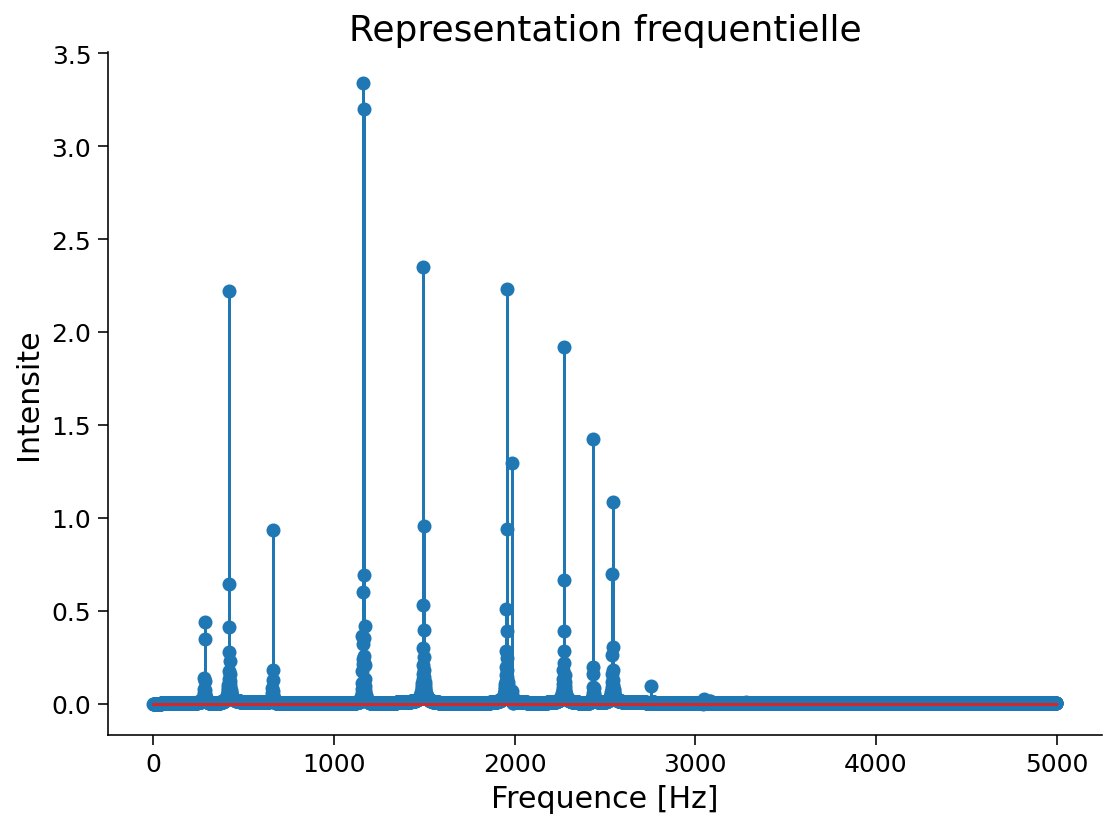

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


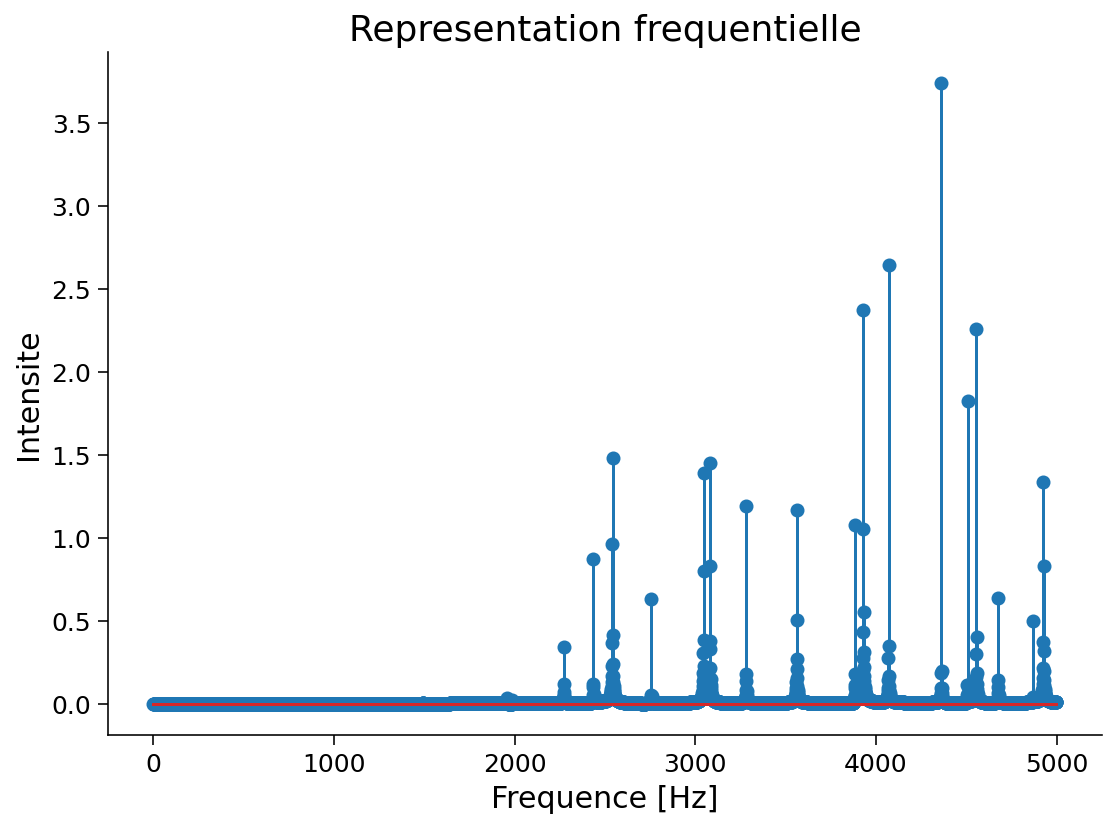

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


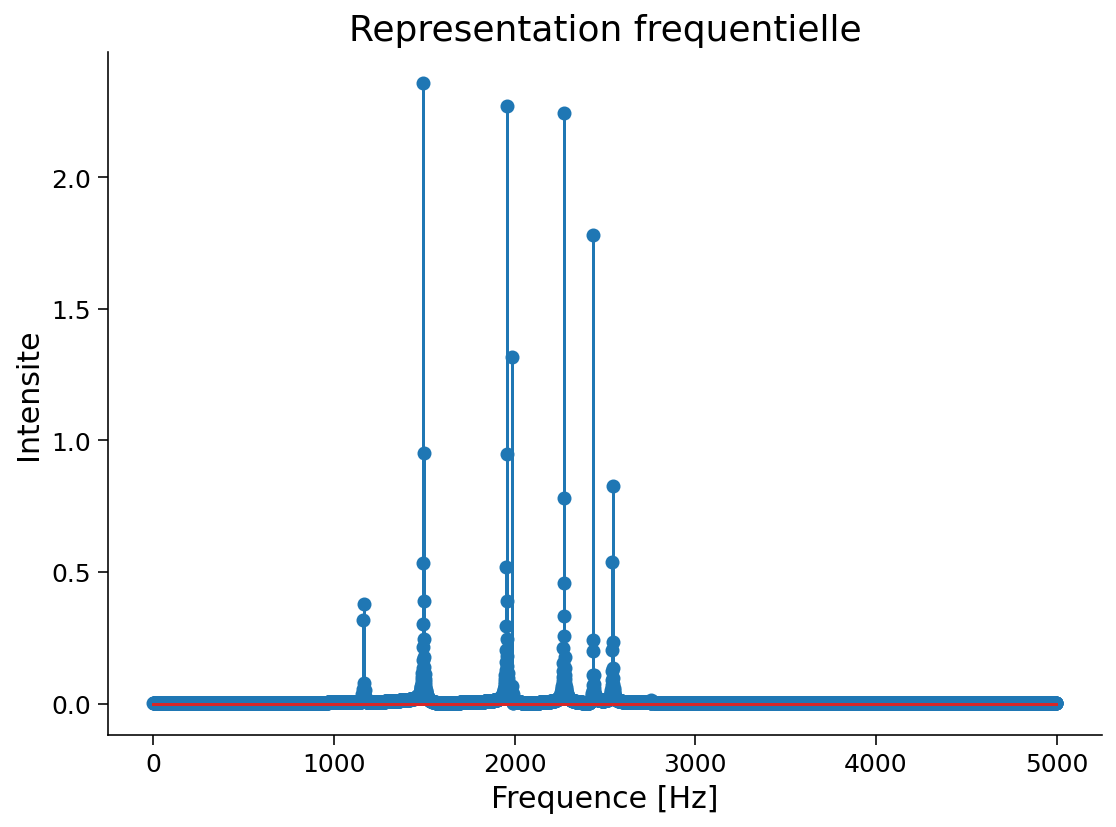

In [ ]:
###################
#  VOTRE CODE ICI #
###################

# Passe-bas 

b,a = CreateFilter(6,'low',(0.5))
lowpasssig = signal.filtfilt(b,a,input_signal)
Tf1,f1 = computeTF(t_vector,lowpasssig)
tf_sig = 2*abs(Tf1[:len(input_signal)//2]/len(input_signal))
RepresFreq(f1,tf_sig)

# Passe-haut 

b2,a2 = CreateFilter(6,'high',0.5)
highpassig = signal.filtfilt(b2,a2,input_signal)
Tf2,f2 = computeTF(t_vector,highpassig)
tf_sig2 = 2*abs(Tf2[:len(input_signal)//2]/len(input_signal))
RepresFreq(f2,tf_sig2)

# Passe-bande

b3,a3 = CreateFilter(6,'band',(0.25,0.5))
bandpassig = signal.filtfilt(b3,a3,input_signal)
Tf3,f3 = computeTF(t_vector,bandpassig)
tf_sig3 = 2*abs(Tf3[:len(input_signal)//2]/len(input_signal))
RepresFreq(f3,tf_sig3)



**Exercice 5**

Comment pourriez-vous représenter l'effet d'un filtre de manière synthétique et le comparer à sa réponse impulsionnelle théorique? Observez-vous des différences? Si oui justifiez.